In [3]:
import pandas as pd
import sklearn

In [4]:
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [9]:
X = pd.DataFrame(cancer.data)

In [12]:
y = pd.Series(cancer.target)

In [19]:
y.value_counts()

1    357
0    212
dtype: int64

In [20]:
y.value_counts()/len(y)

1    0.627417
0    0.372583
dtype: float64

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
model = GradientBoostingClassifier()
model.fit(X.values,y.values)

GradientBoostingClassifier()

In [25]:
size = X.shape[0]
X_train = X.iloc[:int(size*0.7)]
X_test = X.iloc[int(size*0.7):int(size*0.9)]
X_valid = X.iloc[int(size*0.9)]

size = y.shape[0]
y_train = y.iloc[:int(size*0.7)]
y_test = y.iloc[int(size*0.7):int(size*0.9)]
y_valid = y.iloc[int(size*0.9)]

In [26]:
from sklearn.model_selection import train_test_split

In [38]:
# 데이터를 랜덤하게 쪼개기 ,,,
X_train, X_test,y_train,y_test = train_test_split(X.values,y.values,test_size=0.3,random_state=10,stratify=y.values)
yy = pd.Series(y_train)
yy.value_counts()

1    250
0    148
dtype: int64

In [30]:
model.fit(X_train,y_train)
print("fitting result:",model.score(X_test,y_test))

fitting result: 0.9590643274853801


In [57]:
from sklearn.neighbors import KNeighborsClassifier
# knn -> K 만큼의 범위에 분류 다수결로 .. 홀수 값만 올수 있음
K = 3
# n_jobs -> cpu 사용개수 -1이면 쓸수있는거 다 씀
model_kn = KNeighborsClassifier(n_neighbors = K, n_jobs = -1)

In [58]:
model_kn.fit(X_train,y_train)
print(model_kn.score(X_test,y_test))

0.935672514619883


In [64]:
X_test_data = X_test[:10]
y_test_data = y_test[:10]

In [67]:
submission = model_kn.predict(X_test_data)
print(submission)
print(y_test_data)

[1 1 1 0 0 0 0 0 1 1]
[1 1 1 0 0 0 1 0 1 1]


In [71]:
import numpy as np
import matplotlib.pyplot as plt 

In [72]:
X_train = np.array([
    [157,64],
    [179,53],
    [170,67],
    [165,43],
    [177,43]
])
y_train = np.array([
    'm',
    'm',
    'f',
    'f',
    'm'
])

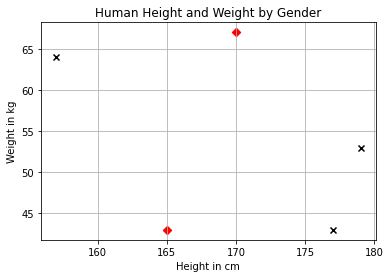

In [76]:
plt.figure()
plt.title('Human Height and Weight by Gender')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i,x in enumerate(X_train):
    plt.scatter(x[0],x[1],c='k' if y_train[i] =='m' else 'r',
               marker = 'x' if y_train[i]=='m' else 'D')
plt.grid(True)
plt.show()

In [84]:
X_test = np.array([[155,70]])

In [82]:
model_kn2 = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
model_kn2.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [89]:
submission = model_kn2.predict_proba(X_test)
print(submission)
print(model_kn2.classes_)

[[0.66666667 0.33333333]]
['f' 'm']


In [90]:
# ----- Regressor --------
X_train = np.array([
    [157,1],
    [166,0],
    [178,0],
    [175,1],
    [156,0],
    [188,1],
    [145,1]
])

y_train = np.array(
    [54,
    42,
    65,
    76,
    65,
    66,
    54]
)

In [92]:
from sklearn.neighbors import KNeighborsRegressor
# 다수결 아니고 평균치이기 때문에 k가 짝수여도 상관없음
model_kr = KNeighborsRegressor(n_neighbors = 2, n_jobs = -1)

In [101]:
model_kr.fit(X_train,y_train)
print("학습결과 :",model_kr.score(X_train,y_train))
model_kr.predict([[150,1]])


학습결과 : 0.7457380860131733


array([59.5])

In [106]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

predicted = model_kr.predict(X_train)
predicted

array([59.5, 48. , 70.5, 70.5, 59.5, 65.5, 59.5])

In [108]:
mean_absolute_error(y_train,predicted)

4.857142857142857

In [110]:
mean_squared_error(y_train,predicted)

26.785714285714285

In [111]:
# -- regressor example
from sklearn.datasets import load_boston
boston = load_boston()
X = pd.DataFrame(boston.data)
y = pd.Series(boston.target)

In [113]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [114]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [120]:
# classifier 일때는 stratify 를 이용해 비율을 train,test에 동일하게 뿌렸는데 regressor에서는 동일한 비중으로 뿌릴 수 없기 때문에 필요x
X_train,X_test,y_train,y_test = train_test_split(X.values,y.values,random_state=1)

In [121]:
print(len(X_train))
print(len(X_test))

379
127


In [128]:
model_kr = KNeighborsRegressor(n_neighbors = 4,n_jobs=-1)
model_kr.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=4)

In [130]:
print("학습:",model_kr.score(X_train,y_train))
print("테스트:",model_kr.score(X_test,y_test))

학습: 0.7164251418080176
테스트: 0.5847379837420476


In [132]:
predict = model_kr.predict(X_test)
print("MAE:",mean_absolute_error(y_test,predict))
print("MSE:",mean_squared_error(y_test,predict))

MAE: 4.075393700787402
MSE: 41.135221456692925
